In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [36]:
X_train = X_train/255
X_test = X_test/255

In [37]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

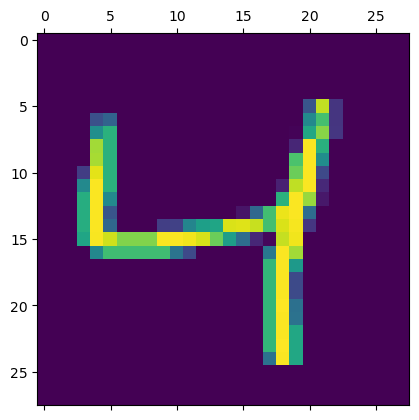

In [38]:
plt.matshow(X_train[2])

In [39]:
Y_train[2]

4

In [40]:
Y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [41]:
X_train_Flatterned = X_train.reshape(len(X_train),28*28)

In [42]:
X_train_Flatterned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
X_train_Flatterned.shape

(60000, 784)

In [44]:
X_test_Flatterned = X_test.reshape(len(X_test),28*28)

In [45]:
X_test_Flatterned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
X_test_Flatterned.shape

(10000, 784)

In [47]:
X_train_Flatterned[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
Neural_Network = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

Neural_Network.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'])
Neural_Network.fit(X_train_Flatterned,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.4686 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.3035 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 961us/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2725 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9259


In [49]:
Neural_Network.evaluate(X_test_Flatterned,Y_test)

313/313 [==============================] - 0s 954us/step - loss: 0.2645 - accuracy: 0.9260


[0.2645204961299896, 0.9259999990463257]

In [50]:
Neural_Network.predict(X_test_Flatterned)

313/313 [==============================] - 0s 826us/step


array([[2.0022945e-02, 2.5312056e-07, 4.4376794e-02, ..., 9.9971265e-01,
        7.2920971e-02, 5.8296359e-01],
       [2.1941794e-01, 5.5696745e-03, 9.9930227e-01, ..., 8.5079567e-13,
        1.3329855e-01, 2.4434685e-09],
       [2.7241316e-04, 9.9318314e-01, 5.9274101e-01, ..., 1.3295151e-01,
        3.5864234e-01, 4.9981762e-02],
       ...,
       [1.9200847e-06, 3.8065530e-06, 1.1113150e-03, ..., 2.2991692e-01,
        4.0213156e-01, 7.9580629e-01],
       [8.3228384e-05, 2.0286179e-04, 1.9309513e-04, ..., 3.6728608e-05,
        5.9219325e-01, 1.3712341e-04],
       [3.9354055e-03, 2.9703931e-10, 1.8382031e-01, ..., 1.1514691e-08,
        1.8530735e-04, 9.0177787e-07]], dtype=float32)

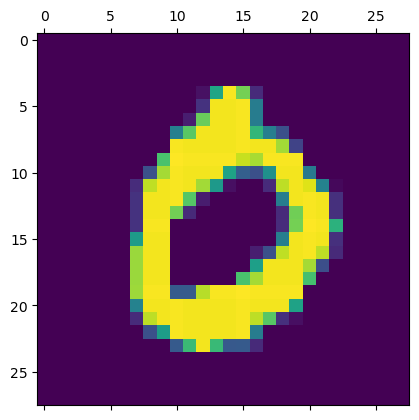

In [58]:
plt.matshow(X_test[3])

In [59]:
Y_predict=Neural_Network.predict(X_test_Flatterned)

313/313 [==============================] - 0s 885us/step


In [60]:
Y_predict[3]

array([9.9885190e-01, 1.2870262e-08, 7.1424812e-02, 2.6570091e-03,
       5.0921000e-05, 7.1814679e-02, 4.3600548e-02, 1.0439607e-02,
       1.6361741e-02, 1.7799087e-02], dtype=float32)

In [61]:
np.argmax(Y_predict[3])

0

In [63]:
Y_predict

array([[2.0022945e-02, 2.5312056e-07, 4.4376794e-02, ..., 9.9971265e-01,
        7.2920971e-02, 5.8296359e-01],
       [2.1941794e-01, 5.5696745e-03, 9.9930227e-01, ..., 8.5079567e-13,
        1.3329855e-01, 2.4434685e-09],
       [2.7241316e-04, 9.9318314e-01, 5.9274101e-01, ..., 1.3295151e-01,
        3.5864234e-01, 4.9981762e-02],
       ...,
       [1.9200847e-06, 3.8065530e-06, 1.1113150e-03, ..., 2.2991692e-01,
        4.0213156e-01, 7.9580629e-01],
       [8.3228384e-05, 2.0286179e-04, 1.9309513e-04, ..., 3.6728608e-05,
        5.9219325e-01, 1.3712341e-04],
       [3.9354055e-03, 2.9703931e-10, 1.8382031e-01, ..., 1.1514691e-08,
        1.8530735e-04, 9.0177787e-07]], dtype=float32)

In [70]:
Y_predict_label = [np.argmax(i) for i in Y_predict]


In [71]:
Y_predict_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [73]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_label)

In [74]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  930,   13,    8,    6,   11,   10,   37,    5],
       [   2,    0,   22,  906,    1,   36,    2,   11,   20,   10],
       [   1,    1,    4,    1,  915,    0,    8,    3,   10,   39],
       [   7,    3,    7,   19,   11,  791,   10,    8,   28,    8],
       [   9,    3,    9,    1,    8,   15,  908,    2,    3,    0],
       [   1,    5,   21,    6,    9,    0,    0,  950,    3,   33],
       [   5,   10,    6,   18,   10,   30,    8,   13,  861,   13],
       [  10,    7,    1,    8,   26,    7,    0,   22,    5,  923]])>

In [75]:
import seaborn as sn

<Axes: >

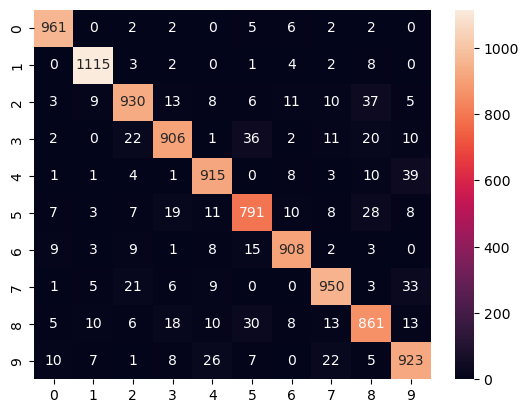

In [78]:
sn.heatmap(cm,annot=True,fmt='d')


In [82]:
Neural_Network = keras.Sequential([
    keras.layers.Dense(200,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

Neural_Network.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'])
Neural_Network.fit(X_train_Flatterned,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2342 - accuracy: 0.9326
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0985 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9888


In [83]:
Neural_Network.evaluate(X_test_Flatterned,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9765


[0.07369910925626755, 0.9764999747276306]

In [85]:
Neural_Network.predict(X_test_Flatterned)
Y_predict=Neural_Network.predict(X_test_Flatterned)
np.argmax(Y_predict[3])
Y_predict_label = [np.argmax(i) for i in Y_predict]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_label)

313/313 [==============================] - 0s 1ms/step


<Axes: >

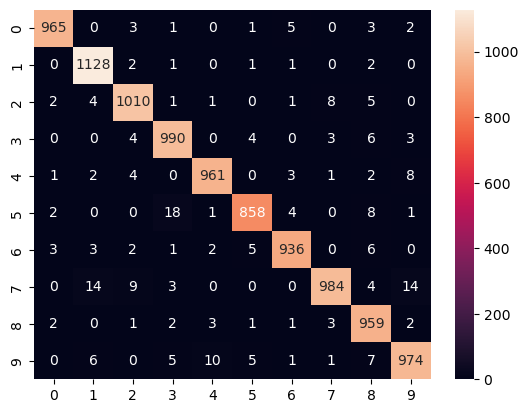

In [86]:
sn.heatmap(cm,annot=True,fmt='d')
